In [40]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('CC GENERAL.csv')


In [8]:
df.shape

(8950, 18)

In [9]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [10]:
# we can check what is type of columns, we have to check they are true types of this columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUSTID : [Categorical] ID of the customer which freaks out the clustering, hence we're gonna drop this.

BALANCE : How rich is this guy?

BALANCEFREQUENCY : How often this guy tops up their account $$$?

PURCHASES : How much money this person spent so far?

ONEOFFPURCHASES : The costliest bill so far.

INSTALLMENTSPURCHASES : The bills this person hesitated to make in one go.

CASHADVANCE : Cash in advance given by this person

PURCHASESFREQUENCY : How Mr.Beast is this guy?

ONEOFFPURCHASESFREQUENCY : How un-hesitating Mr.Beast is this guy?

PURCHASESINSTALLMENTSFREQUENCY : How hesitating Mr.Beast is this guy?

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : How busy is this guy purchasing things?

CREDITLIMIT : The limit of this guy's paradise

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [11]:
# we dont have any nan value which is good
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

High Standard Deviations in Purchases and One-Off Purchases: Notably high standard deviations observed in the 'PURCHASES' (2136.63) and 'ONEOFF_PURCHASES' (1659.89) columns signify considerable variability in user spending behaviors. This variability suggests that while some users make exceptionally high purchases, others tend towards minimal spending, indicating a possibility of significant outliers in these categories.

Wide Range in Values: The substantial disparity between minimum and maximum values, particularly in columns like 'BALANCE' (ranging from 0 to 19043.14), 'PURCHASES' (0 to 49039.57), and 'CASH_ADVANCE' (0 to 47137.21), illustrates a broad spectrum of user behaviors. This range suggests significant variations in credit card usage habits among different individuals.

Distribution of Values: The distribution of values, as indicated by the 25th, 50th (median), and 75th percentiles, reveals telling aspects of the data. For instance, the median of the 'BALANCE' column (873.39) being lower than its mean (1564.47) points towards a right-skewed distribution, implying a larger number of users with lower balances.

Usage Frequencies: Columns such as 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', and 'PURCHASES_INSTALLMENTS_FREQUENCY' shed light on how frequently users engage with their credit cards. The averages and standard deviations within these categories indicate that while some users frequently utilize their cards, others do so more sparingly.

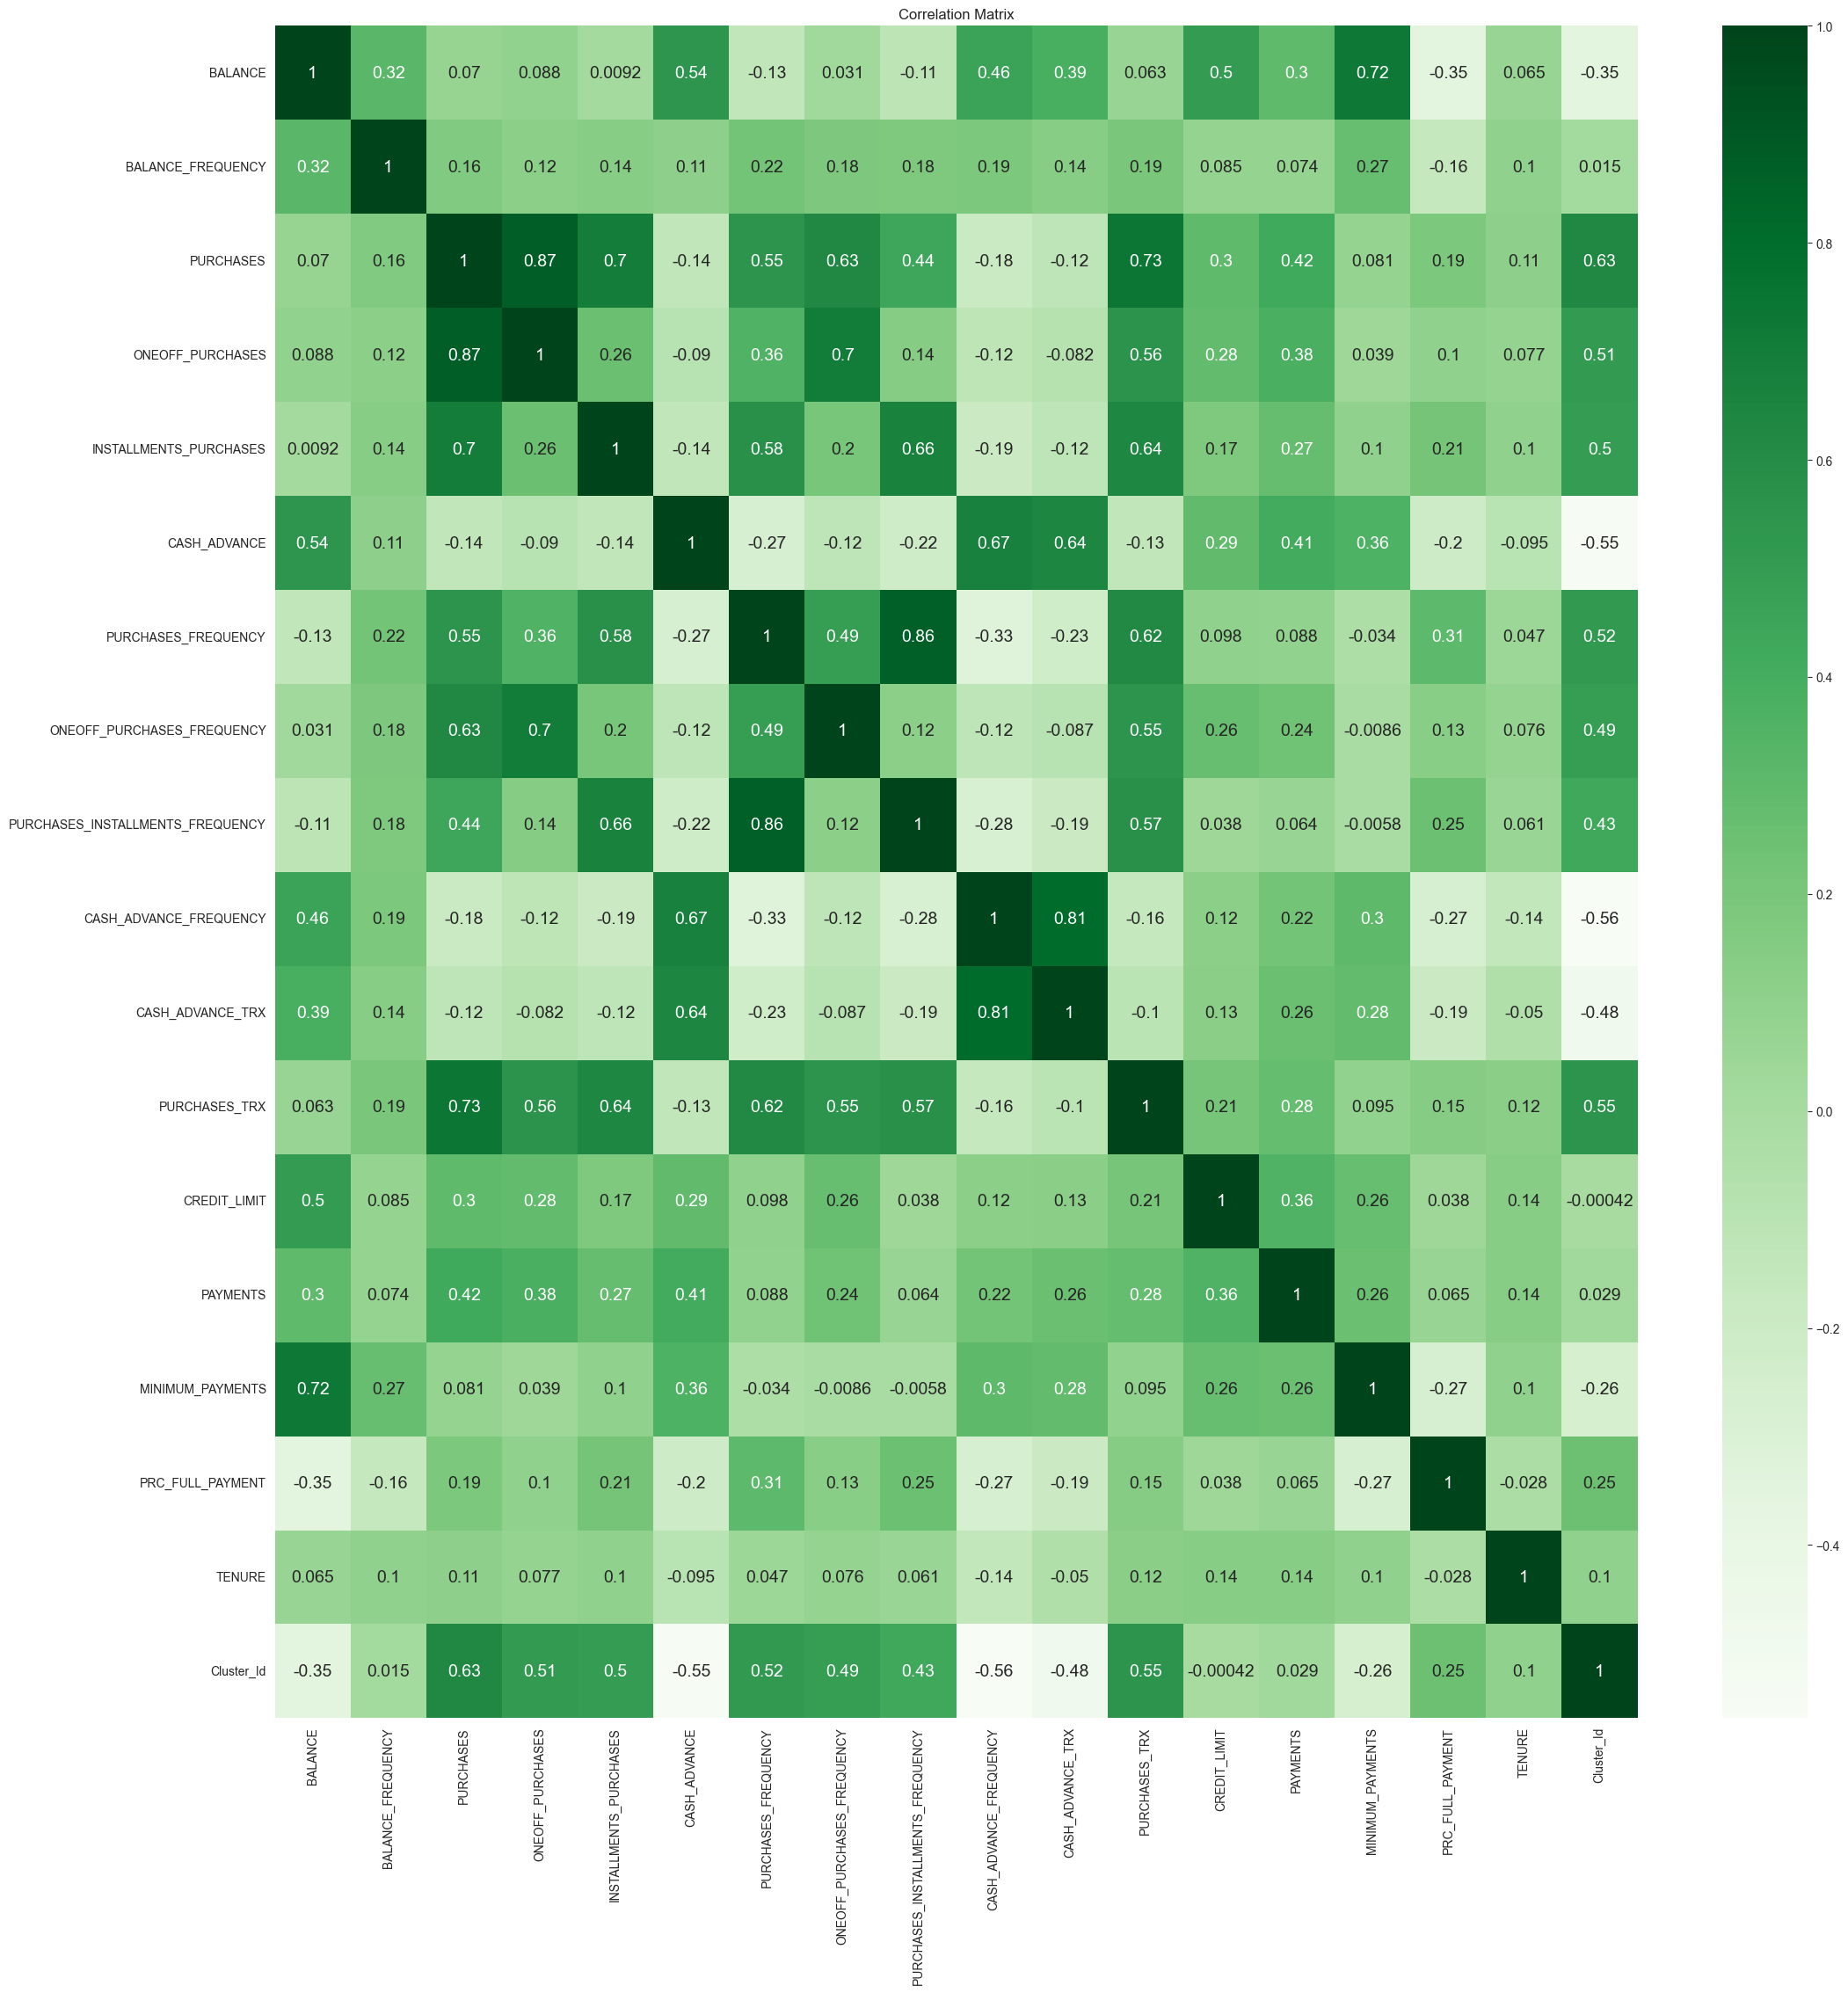

In [42]:
df_numerical = df.select_dtypes(include=[np.number])

corr_coef = df_numerical.corr()

# Heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_coef, cmap='Greens', annot=True, annot_kws={'size':14},
            xticklabels=corr_coef.columns,
            yticklabels=corr_coef.columns)
plt.title('Correlation Matrix')

corr_cols = corr_coef.columns.to_list() 
signif_corr = []
for i in range(len(corr_cols)):
    col = corr_cols[i]
    signif_corr.append(abs(corr_coef[col])[abs(corr_coef[col]) >= 0.7])
signif_corr_df = pd.DataFrame(signif_corr)



([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CASH_ADVANCE_TRX'),
  Text(1, 0, 'PURCHASES_TRX'),
  Text(2, 0, 'CREDIT_LIMIT'),
  Text(3, 0, 'PAYMENTS'),
  Text(4, 0, 'MINIMUM_PAYMENTS'),
  Text(5, 0, 'PRC_FULL_PAYMENT'),
  Text(6, 0, 'TENURE')])

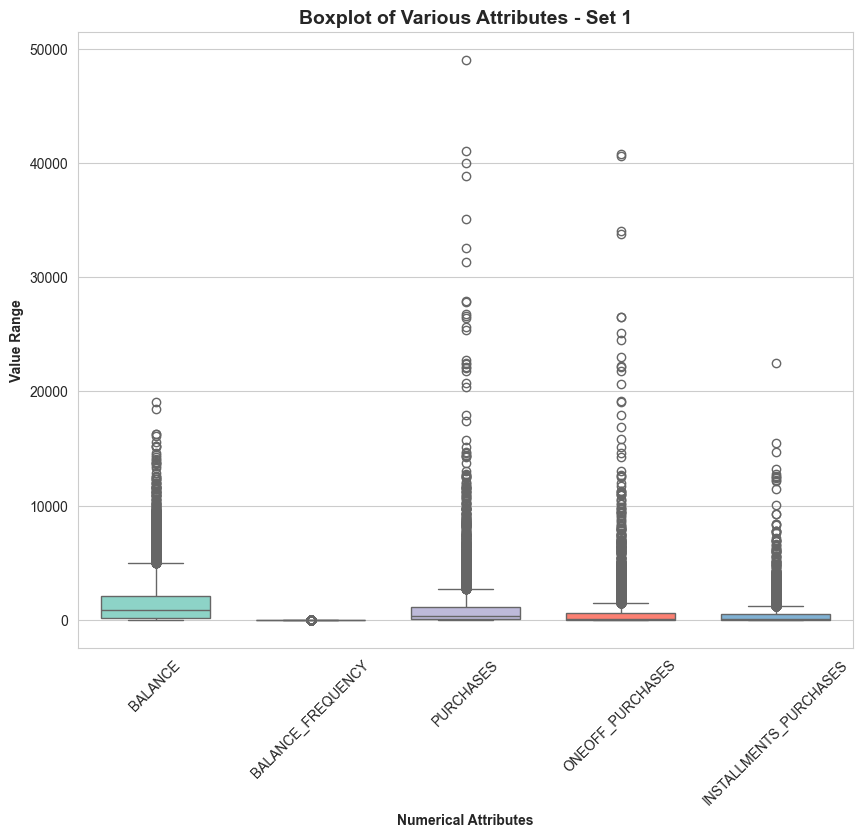

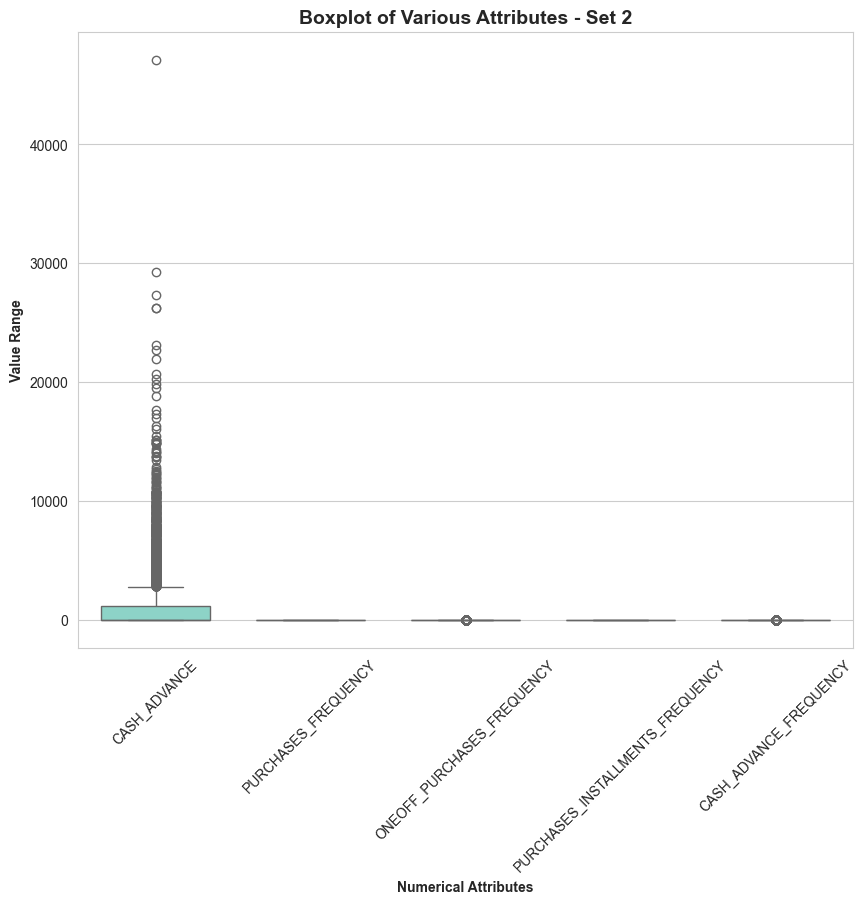

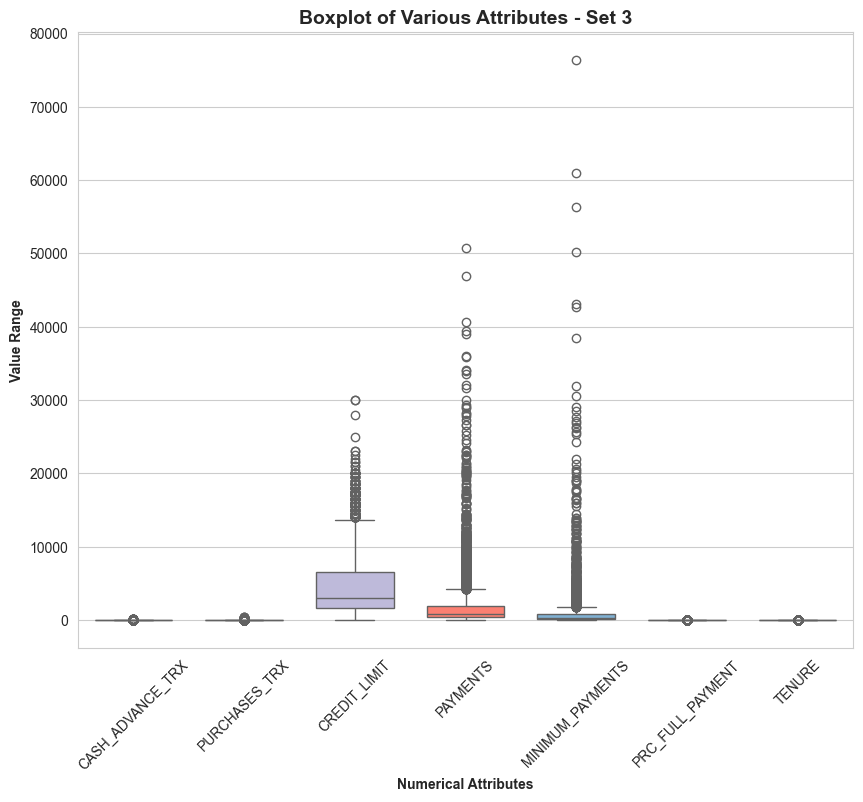

In [17]:
num_attr = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
third_index = len(num_attr) // 3

# First set of attributes
first_set_attributes = num_attr[:third_index]
plt.figure(figsize=[10, 8])
sns.boxplot(data=df[first_set_attributes], orient='v', palette='Set3', whis=1.5, saturation=1, width=0.7)
plt.title('Boxplot of Various Attributes - Set 1', fontsize=14, fontweight='bold')
plt.ylabel('Value Range', fontweight='bold')
plt.xlabel('Numerical Attributes', fontweight='bold')
plt.xticks(rotation=45)

# Second set of attributes
second_set_attributes = num_attr[third_index:2*third_index]
plt.figure(figsize=[10, 8])
sns.boxplot(data=df[second_set_attributes], orient='v', palette='Set3', whis=1.5, saturation=1, width=0.7)
plt.title('Boxplot of Various Attributes - Set 2', fontsize=14, fontweight='bold')
plt.ylabel('Value Range', fontweight='bold')
plt.xlabel('Numerical Attributes', fontweight='bold')
plt.xticks(rotation=45)

# Third set of attributes
third_set_attributes = num_attr[2*third_index:]
plt.figure(figsize=[10, 8])
sns.boxplot(data=df[third_set_attributes], orient='v', palette='Set3', whis=1.5, saturation=1, width=0.7)
plt.title('Boxplot of Various Attributes - Set 3', fontsize=14, fontweight='bold')
plt.ylabel('Value Range', fontweight='bold')
plt.xlabel('Numerical Attributes', fontweight='bold')
plt.xticks(rotation=45)




In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

columns_to_clean = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for column in columns_to_clean:
    df = remove_outliers(df, column)


In [19]:
scaler = StandardScaler()
numerical_features = df[num_attr]
scaled_features = scaler.fit_transform(numerical_features)
print("Scaled data dimensions:", scaled_features.shape)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)
scaled_df.head()

Scaled data dimensions: (8281, 17)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.756216          -0.356038  -0.618468         -0.535224   
1  0.895740           0.078249  -0.700913         -0.535224   
2  0.526158           0.512535  -0.032738          0.364672   
3 -0.350321           0.512535  -0.687086         -0.516602   
4  0.168070           0.512535   0.451310         -0.535224   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.438571     -0.535477            -0.806814   
1               -0.601975      3.329241            -1.223952   
2               -0.601975     -0.535477             1.278868   
3               -0.601975     -0.535477            -1.015384   
4                1.681715     -0.535477             0.444595   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.676695                         -0.705592   
1                   -0.676695                         -0.916452   
2                    2.749282                         -0.916452   
3                   -0.391198                         -0.916452   
4                   -0.676695                          0.559571   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.684684         -0.495819      -0.564372     -0.973183   
1                0.577214          0.132471      -0.663862      0.777057   
2               -0.684684         -0.495819      -0.066920      0.922910   
3               -0.684684         -0.495819      -0.614117     -0.914842   
4               -0.684684         -0.495819      -0.265901     -0.739818   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.747927         -0.599445         -0.533638  0.359747  
1  1.569904          0.544483          0.222381  0.359747  
2 -0.498236         -0.001288         -0.533638  0.359747  
3 -0.464806         -0.470338         -0.533638  0.359747  
4 -0.036009          2.181475         -0.533638  0.359747

In [20]:
scaled_df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
for col in scaled_df.columns:
  print(col, scaled_df[col].nunique())

BALANCE 8276
BALANCE_FREQUENCY 42
PURCHASES 5740
ONEOFF_PURCHASES 3709
INSTALLMENTS_PURCHASES 4120
CASH_ADVANCE 4030
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 58
PURCHASES_TRX 144
CREDIT_LIMIT 193
PAYMENTS 8281
MINIMUM_PAYMENTS 8280
PRC_FULL_PAYMENT 47
TENURE 7


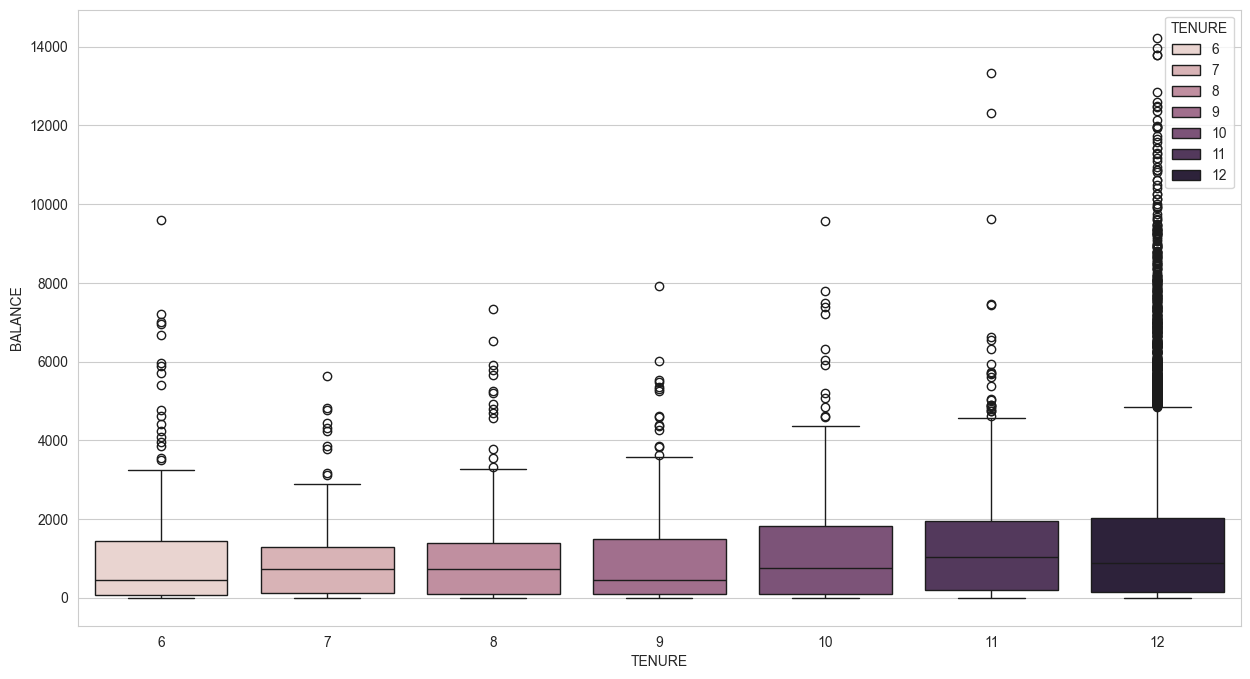

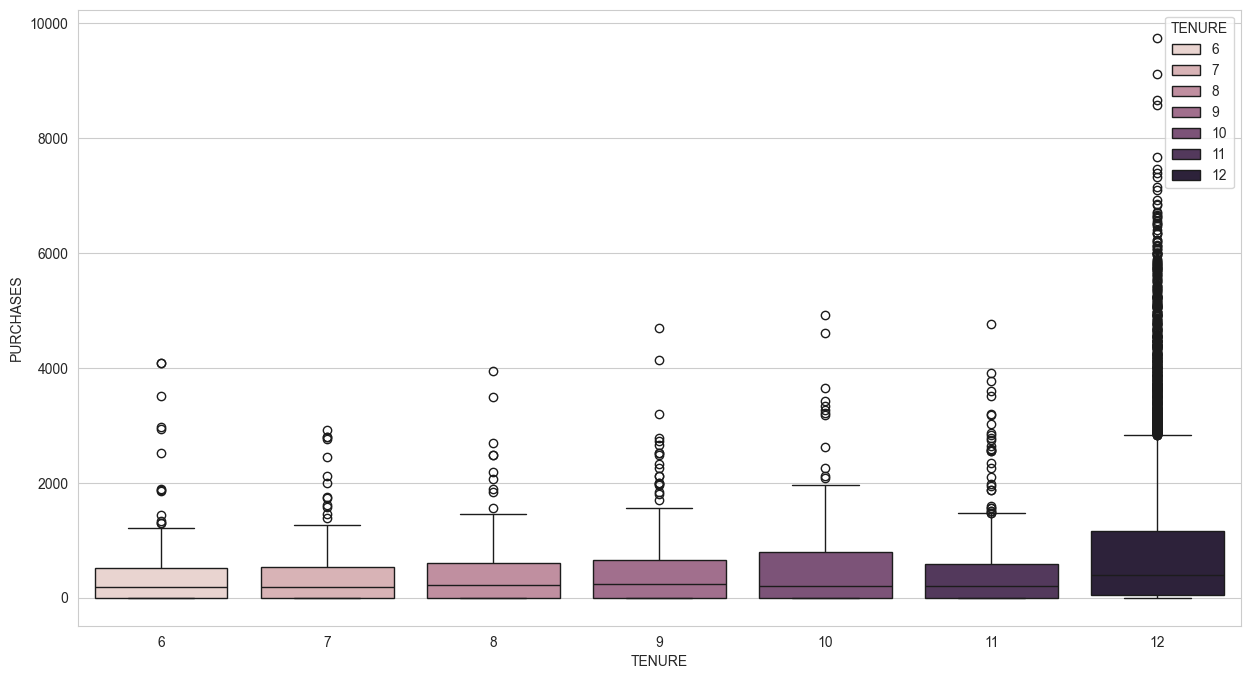

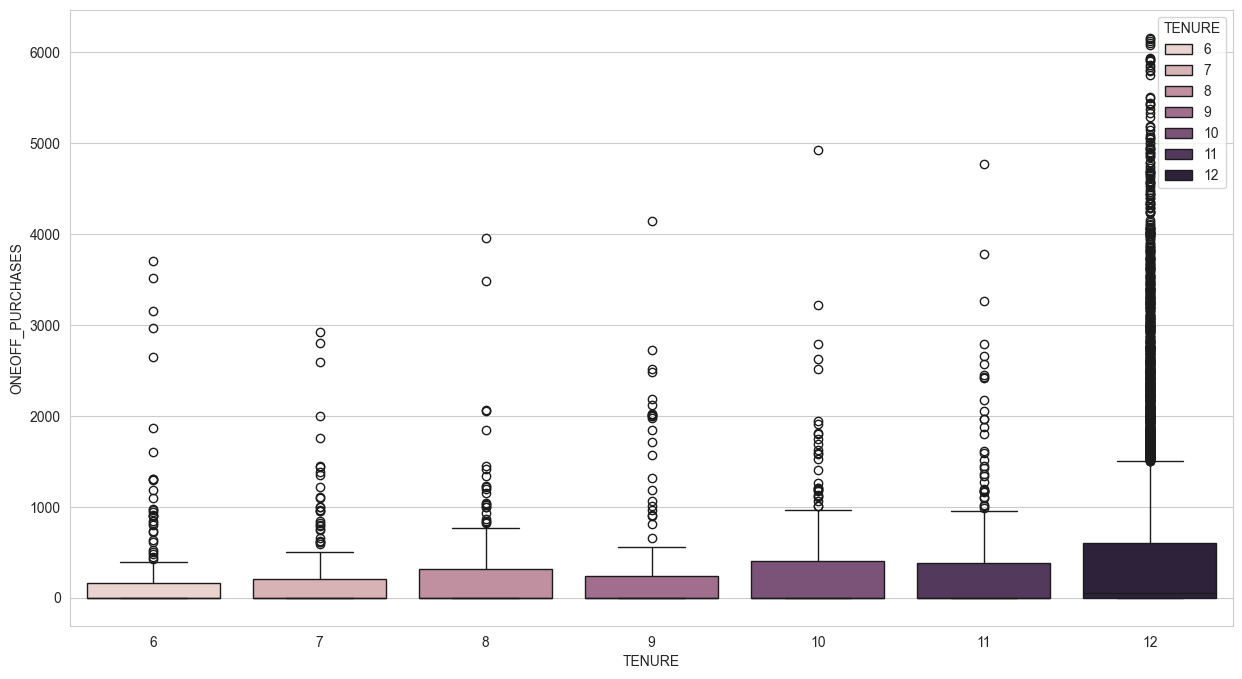

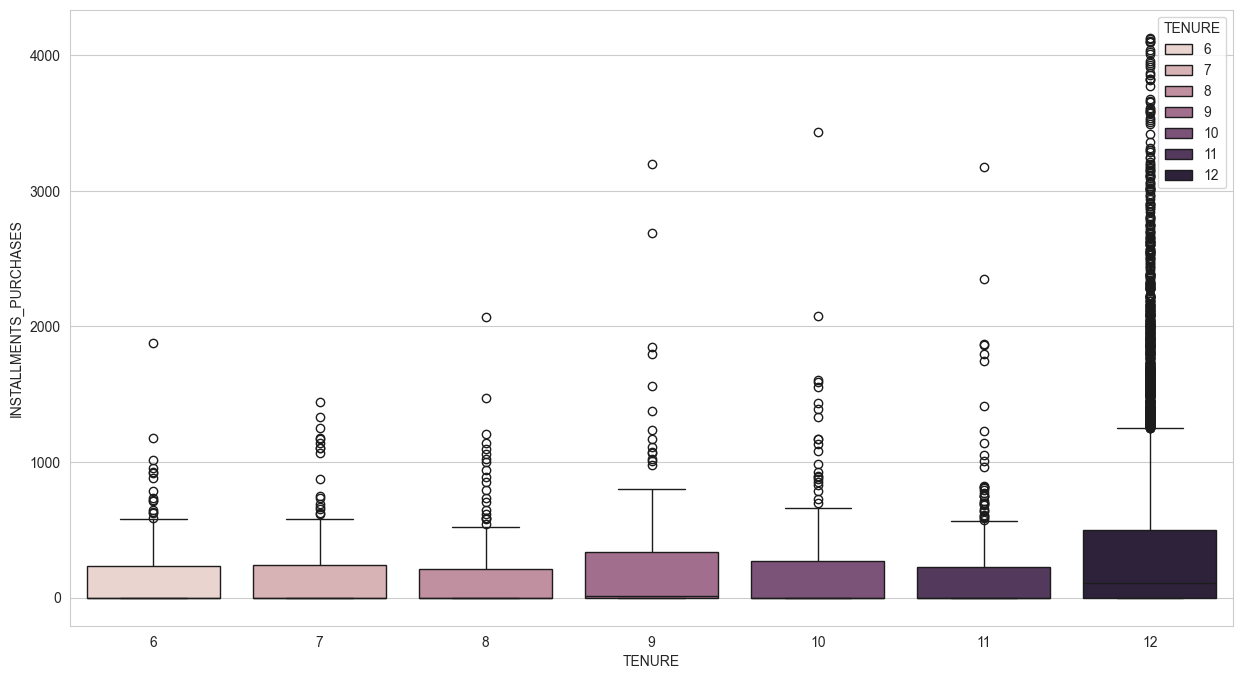

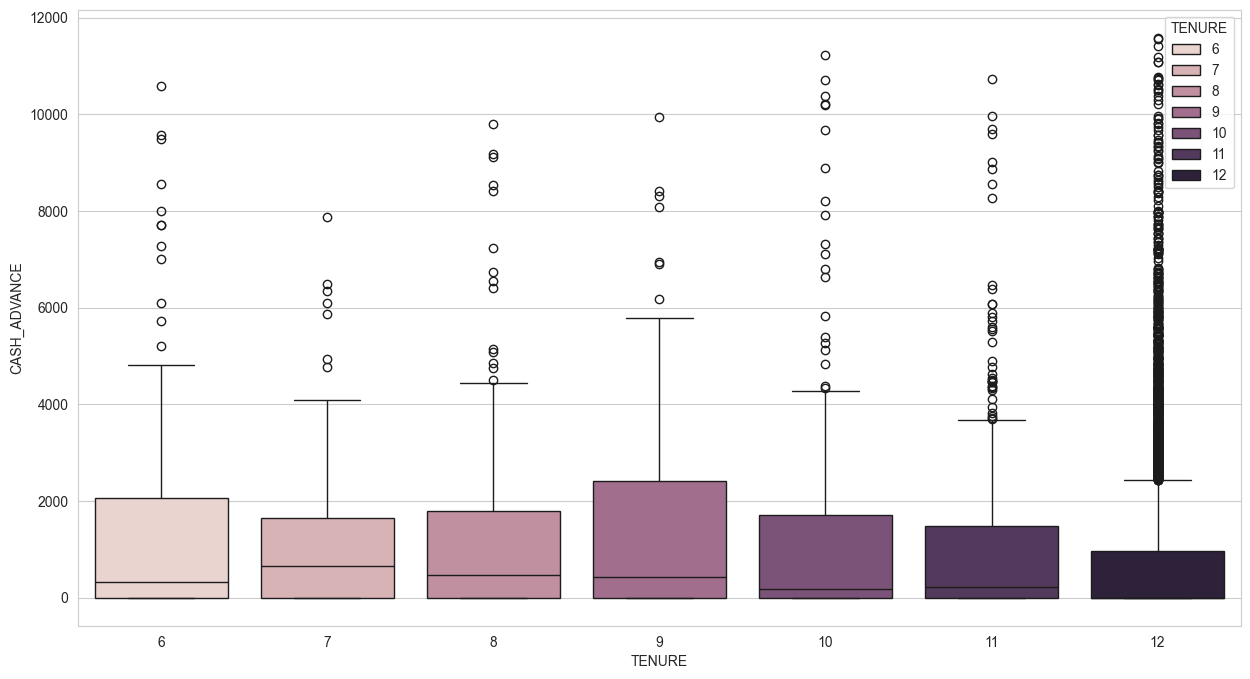

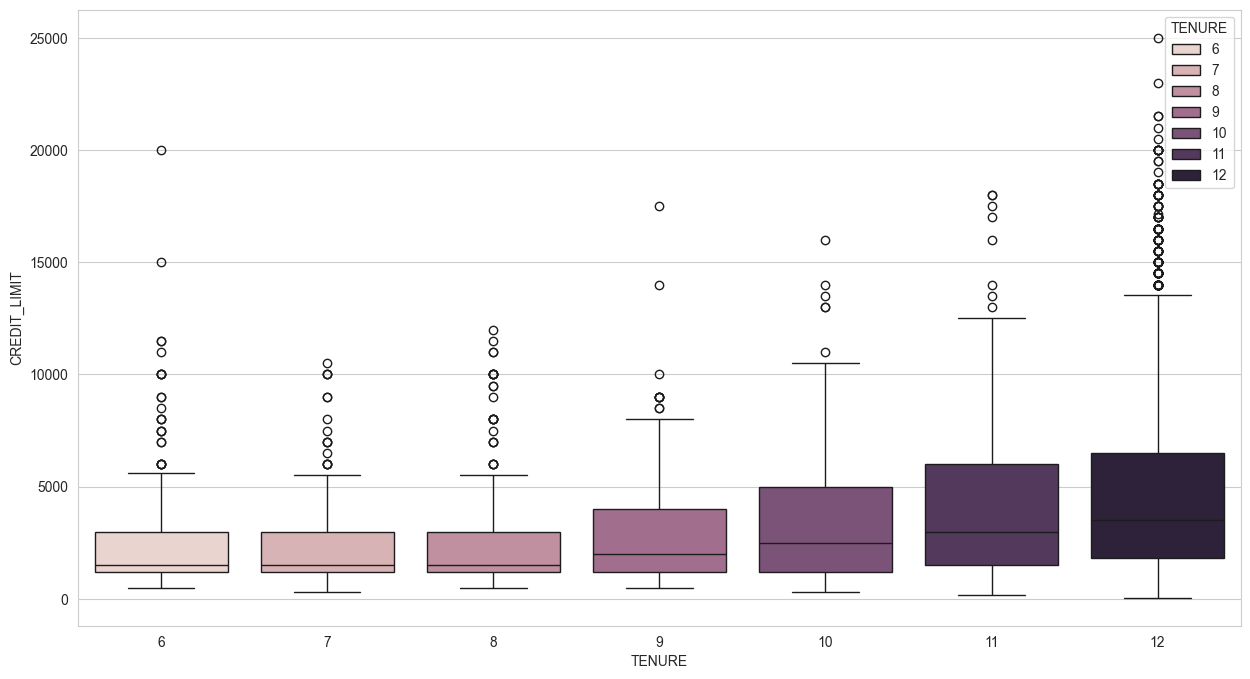

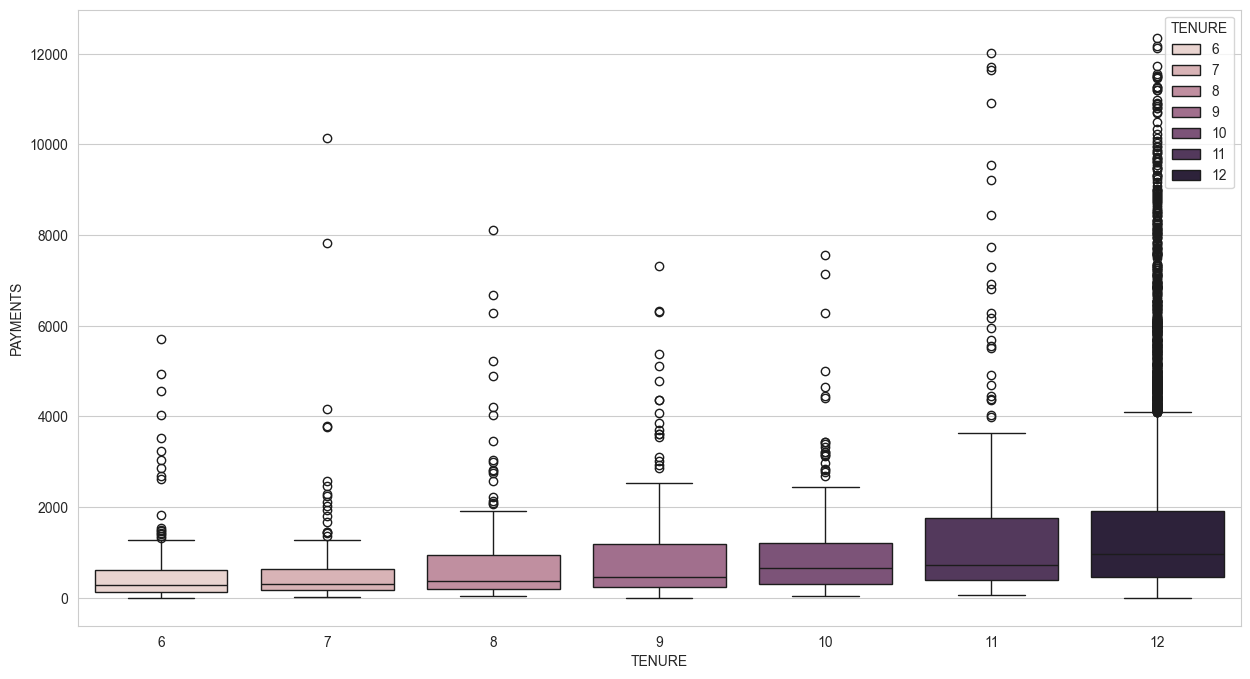

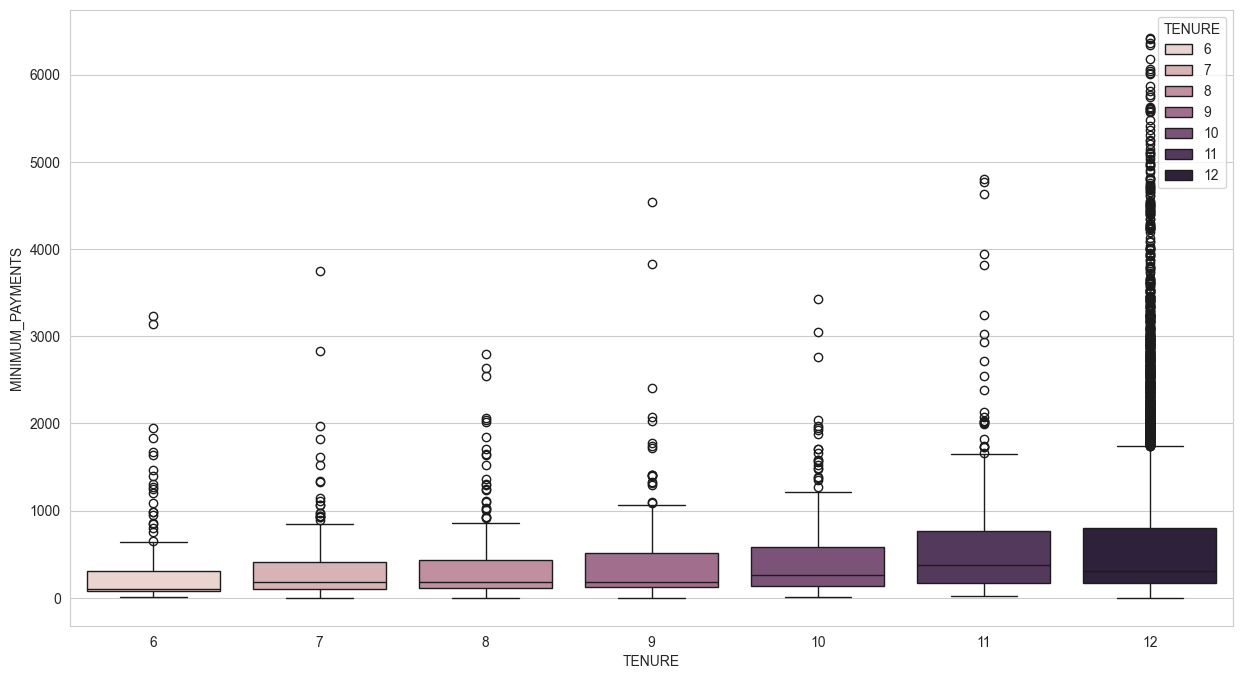

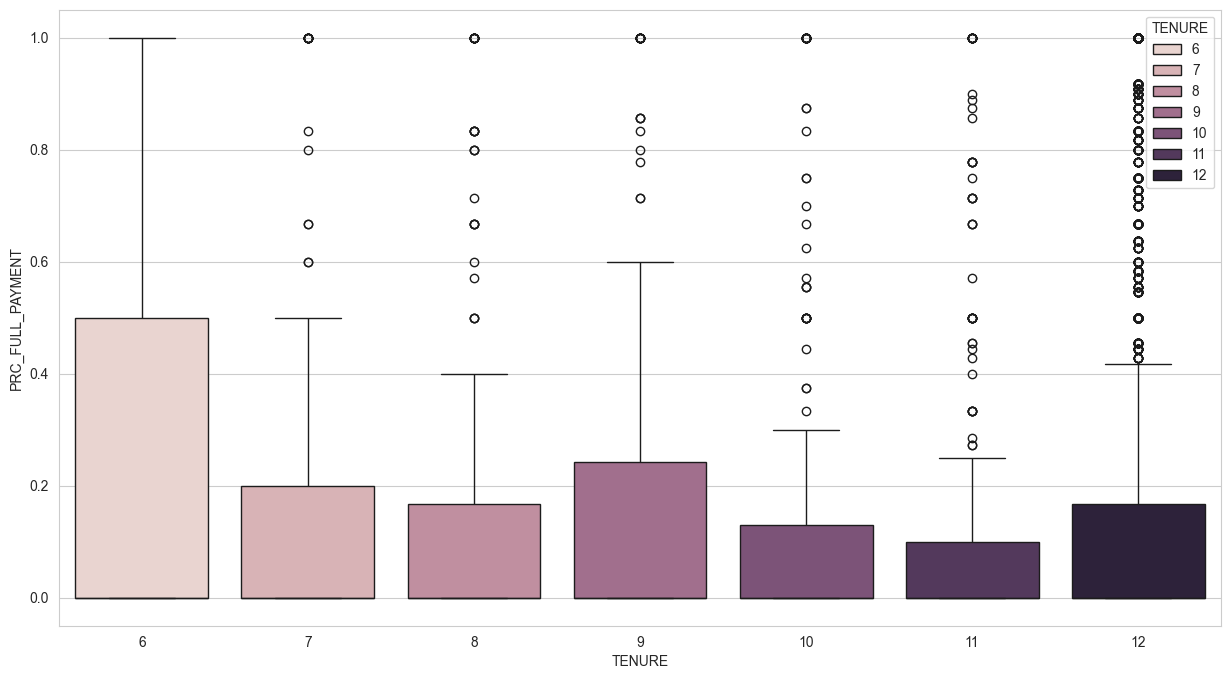

In [23]:
df_box_plot = scaled_df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

for col in df_box_plot.columns:
  plt.figure(figsize=(15,8))
  plt.ax = sns.boxplot(x="TENURE", y=col, hue="TENURE", data = df)

BALANCE_FREQUENCY
1.000000    5832
0.909091     391
0.818182     265
0.545455     216
0.727273     212
0.636364     201
0.454545     168
0.363636     163
0.272727     137
0.181818     113
0.833333      59
0.875000      55
0.900000      53
0.888889      51
0.857143      50
0.500000      38
0.666667      36
0.090909      24
0.777778      21
0.800000      20
0.571429      19
0.750000      17
0.333333      15
0.714286      14
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.300000       9
0.375000       8
0.444444       7
0.285714       7
0.200000       7
0.000000       6
0.600000       6
0.250000       5
0.428571       4
0.222222       2
0.100000       2
0.125000       2
0.166667       1
0.142857       1
Name: count, dtype: int64
PURCHASES_FREQUENCY
1.000000    1961
0.000000    1904
0.083333     608
0.500000     380
0.916667     375
0.166667     358
0.833333     353
0.333333     341
0.250000     320
0.583333     300
0.666667     296
0.750000     282
0.416667     277
0

<Figure size 2000x1000 with 0 Axes>

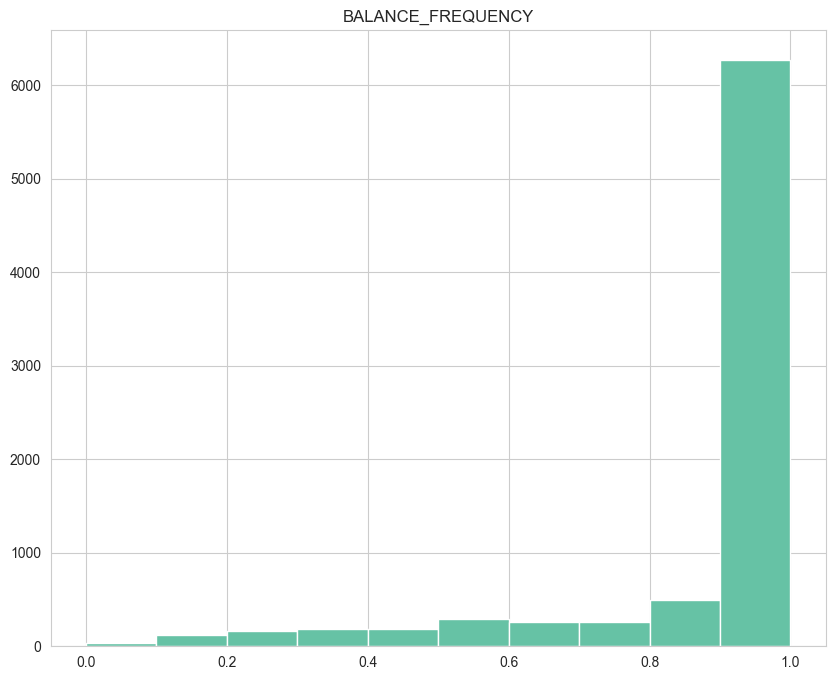

<Figure size 2000x1000 with 0 Axes>

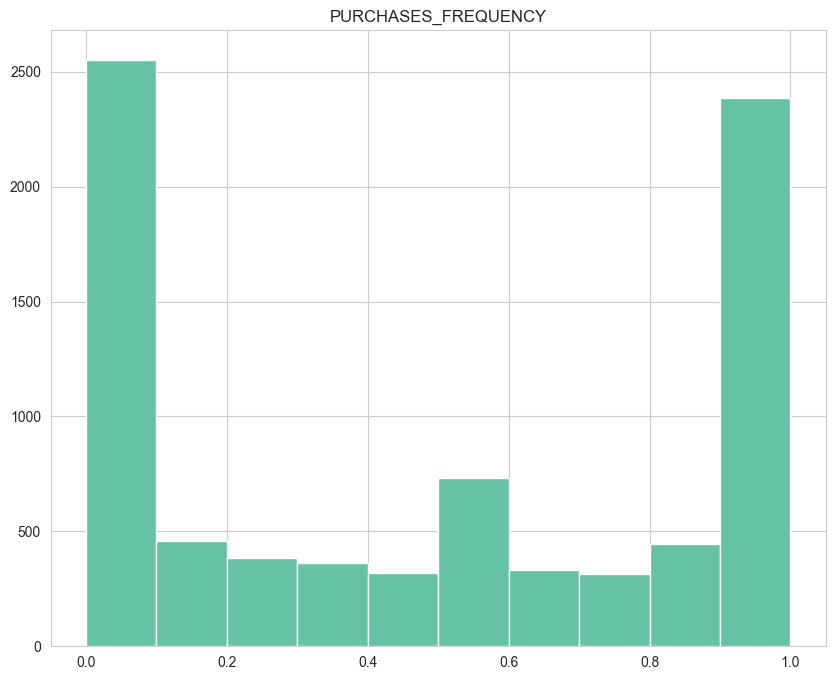

<Figure size 2000x1000 with 0 Axes>

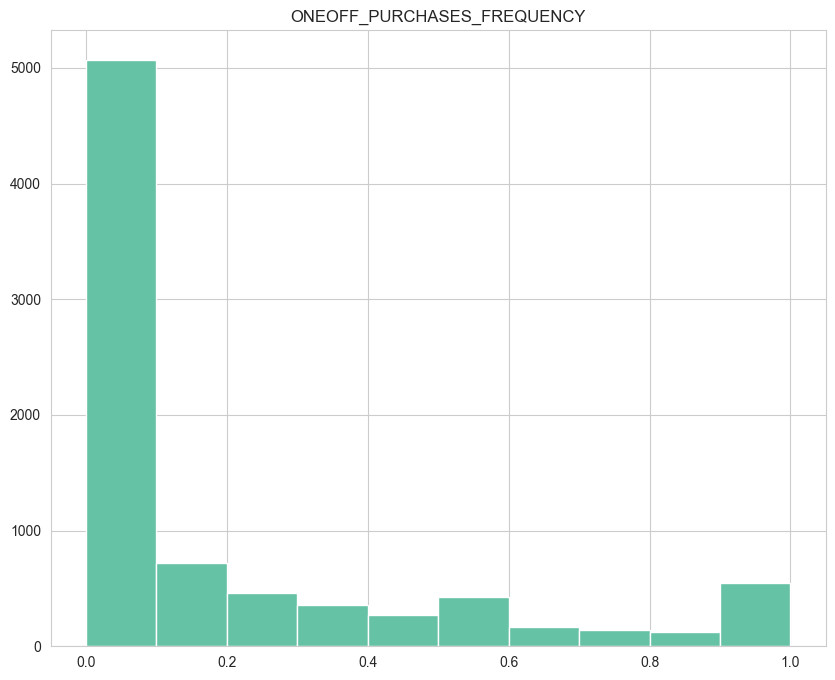

<Figure size 2000x1000 with 0 Axes>

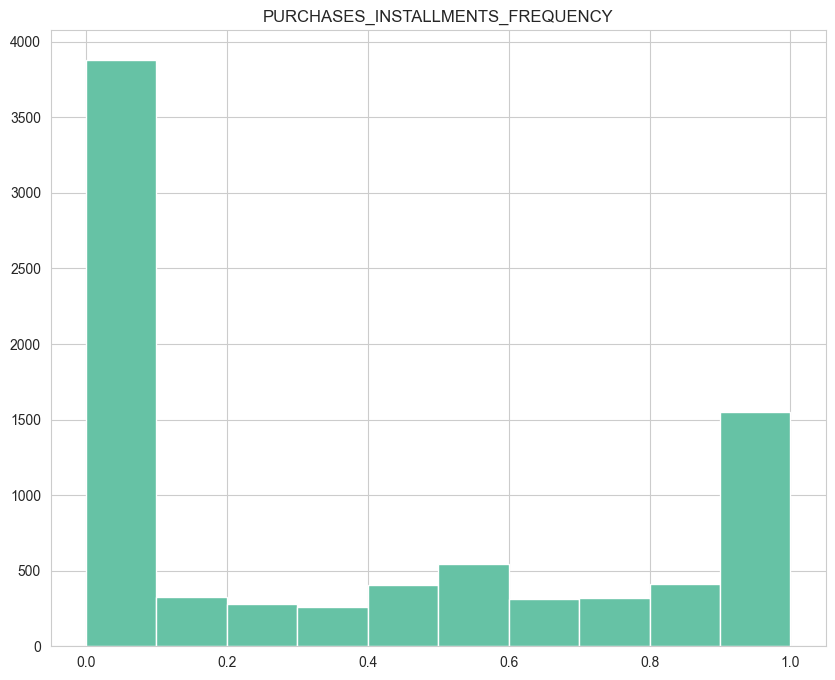

<Figure size 2000x1000 with 0 Axes>

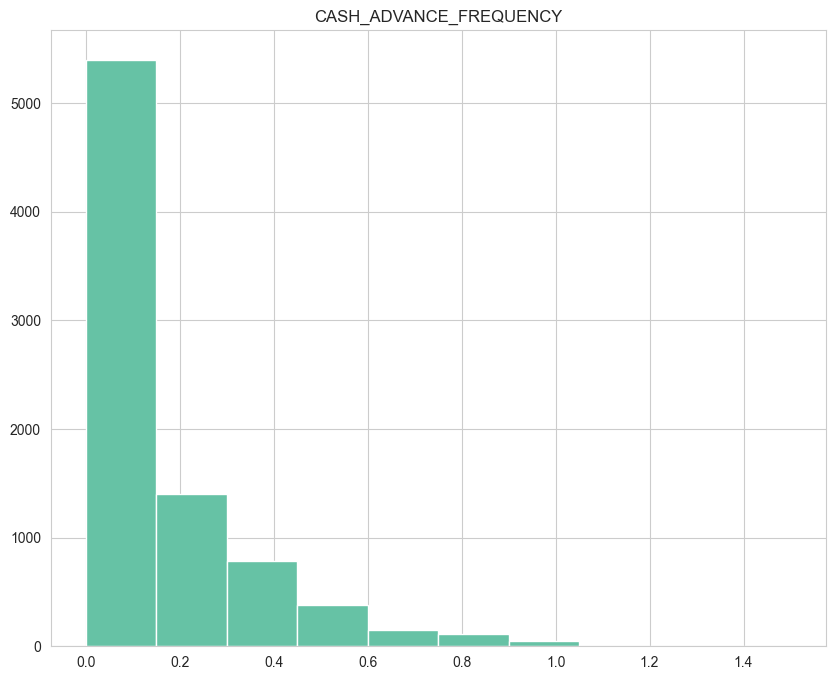

<Figure size 2000x1000 with 0 Axes>

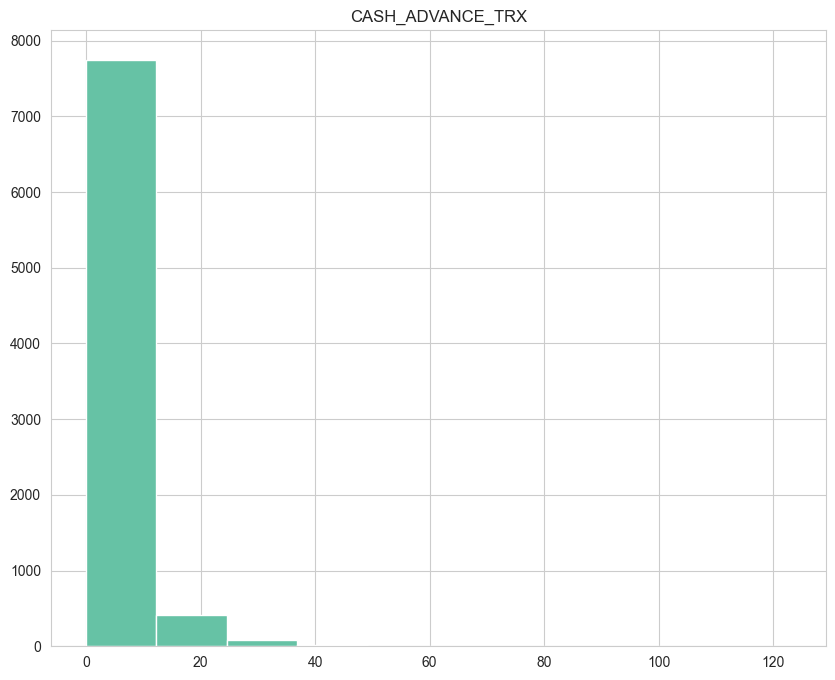

<Figure size 2000x1000 with 0 Axes>

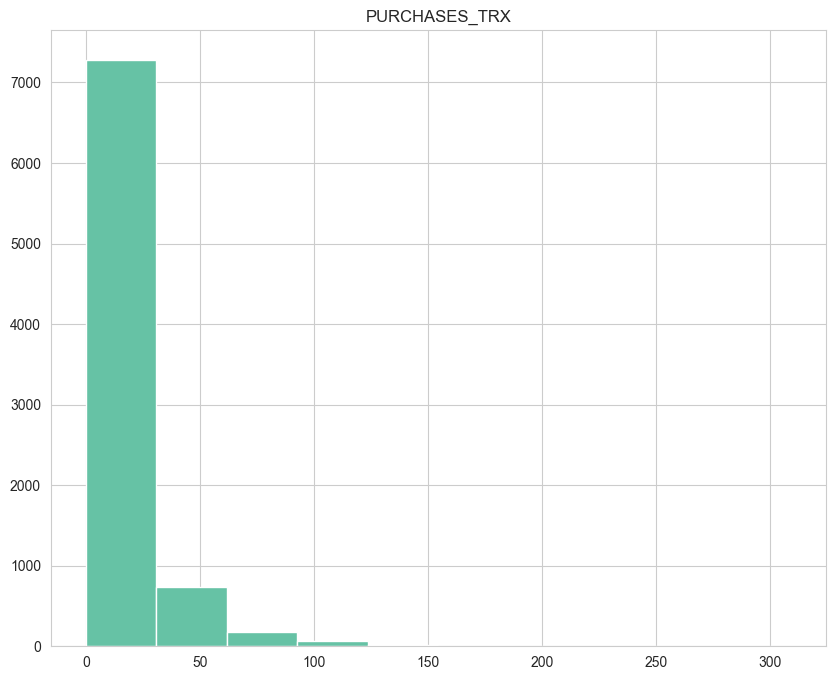

<Figure size 2000x1000 with 0 Axes>

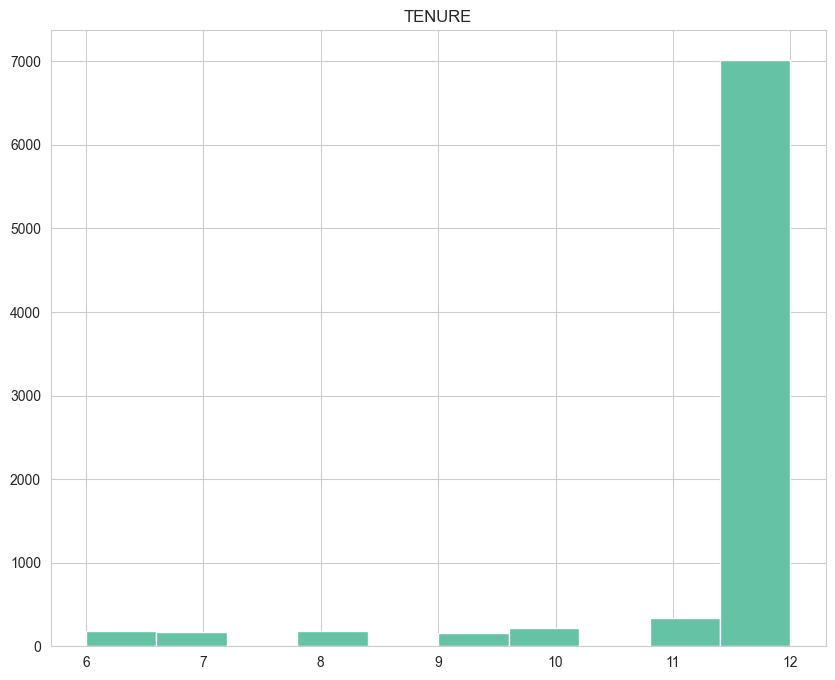

In [24]:
df_histogram = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]
for col in df_histogram.columns:
  plt.figure(figsize=(20,10))
  df_histogram.hist(col)
  print (df_histogram[col].value_counts())

### K Means Clustring

In [25]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [26]:
kmeans.labels_

array([2, 1, 0, ..., 0, 2, 2], dtype=int32)

#### elbow method for ddetermine this optimal value of k.

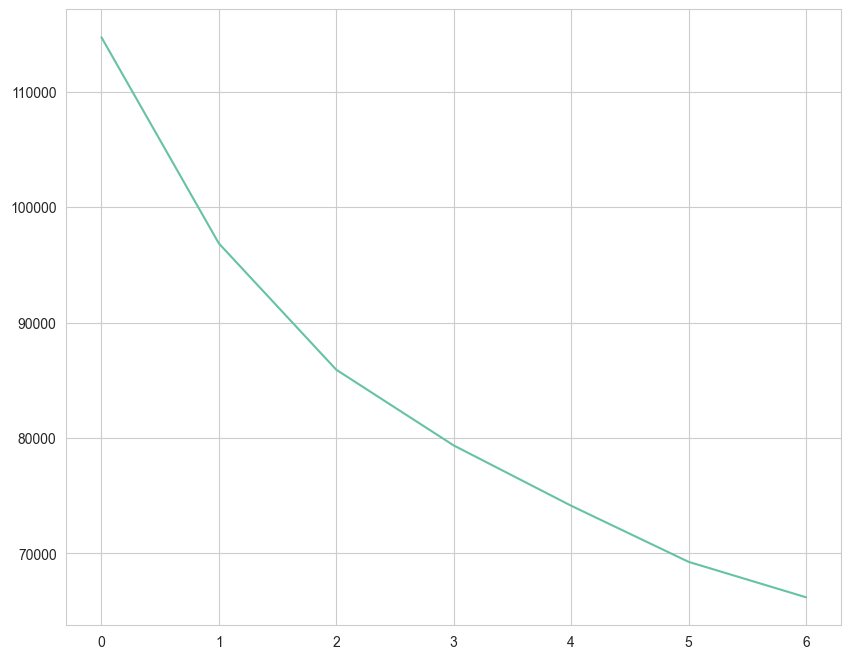

In [27]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [28]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.2072858969061162
For n_clusters=3, the silhouette score is 0.2425030948060913
For n_clusters=4, the silhouette score is 0.1864892743254138
For n_clusters=5, the silhouette score is 0.18975594649837962
For n_clusters=6, the silhouette score is 0.20098025833441888
For n_clusters=7, the silhouette score is 0.18429371707583653
For n_clusters=8, the silhouette score is 0.21369539852436745


In [29]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [31]:
 kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
# assign the label
df['Cluster_Id'] = kmeans.labels_
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_Id  
0   201.802084        139.509787          0.000000      12           1  
1  4103.032597       1072.340217          0.222222      12           0  
2   622.066742        627.284787          0.000000      12           1  
4   678.334763        244.791237          0.000000      12           1  
5  1400.057770       2407.246035          0.000000      12           1

 i will visualize Cluster Id with different features to validate the results

<Axes: xlabel='Cluster_Id', ylabel='CASH_ADVANCE'>

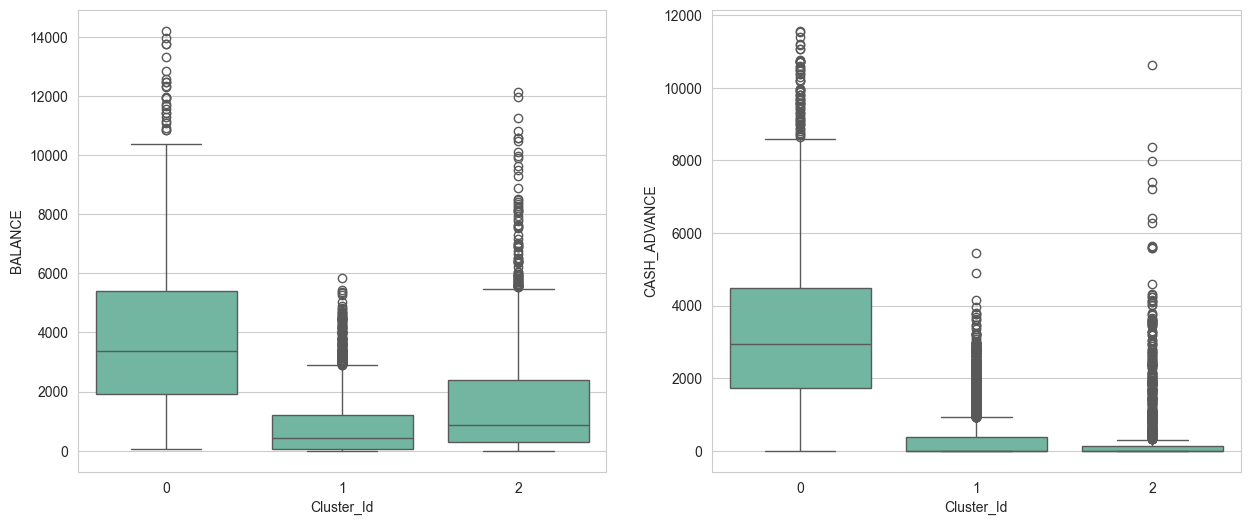

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='BALANCE', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='CASH_ADVANCE', data=df)

<Axes: xlabel='Cluster_Id', ylabel='PURCHASES'>

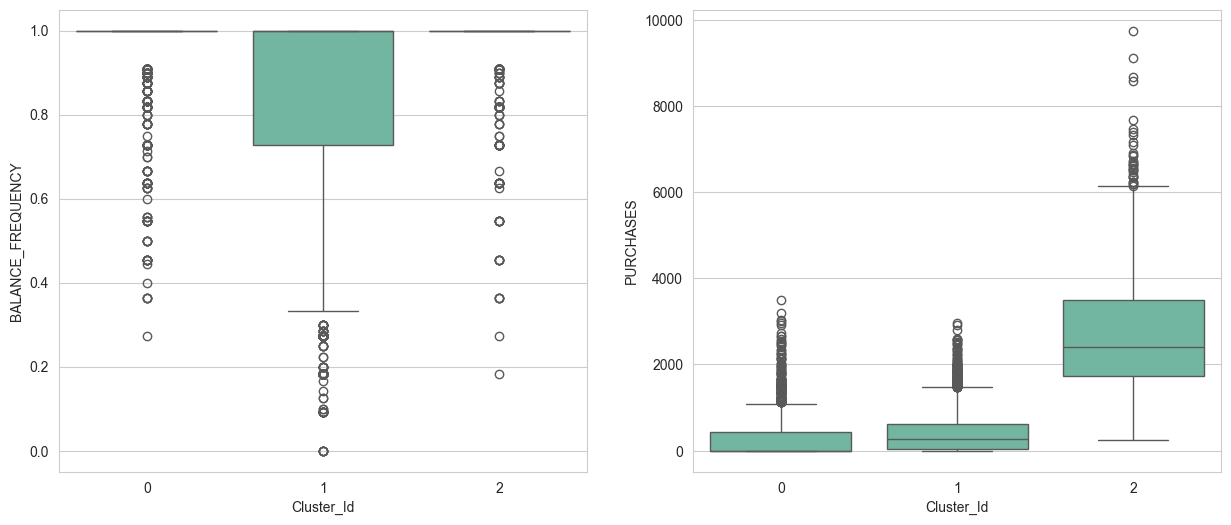

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='BALANCE_FREQUENCY', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='PURCHASES', data=df)

<Axes: xlabel='Cluster_Id', ylabel='MINIMUM_PAYMENTS'>

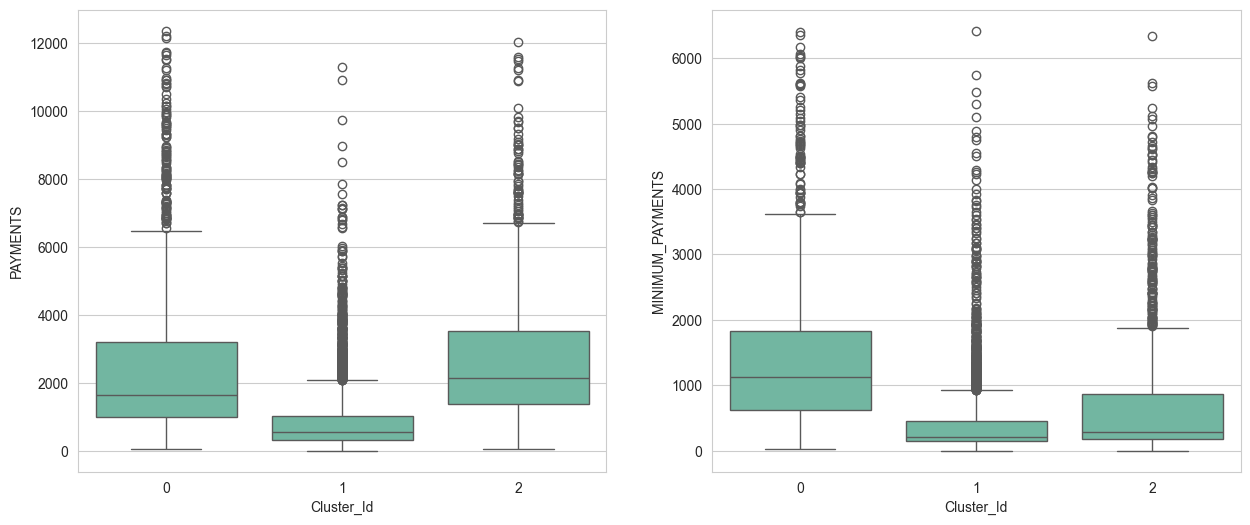

In [36]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='PAYMENTS', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='MINIMUM_PAYMENTS', data=df)

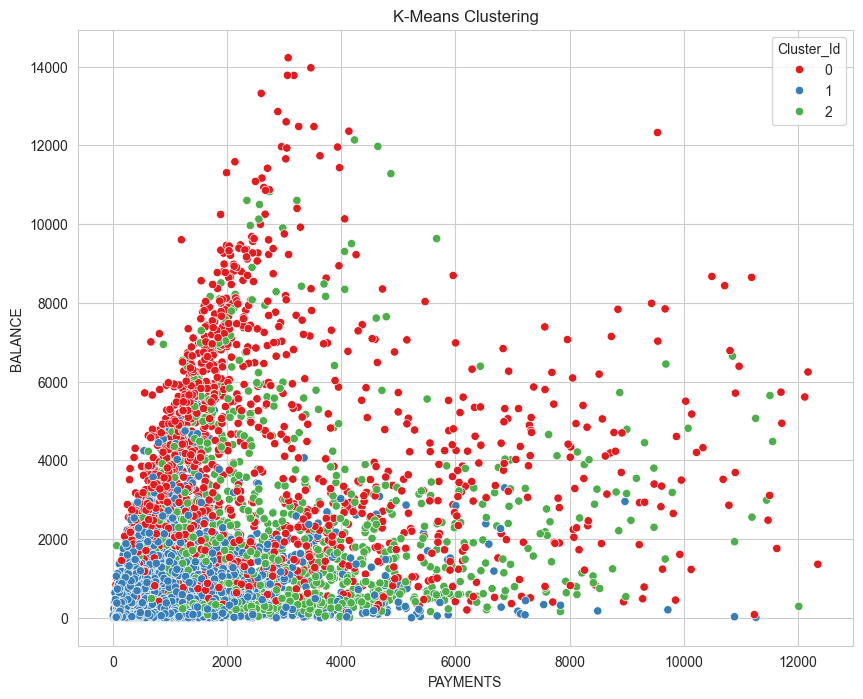

In [37]:
sns.scatterplot(data=df, x='PAYMENTS', y='BALANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

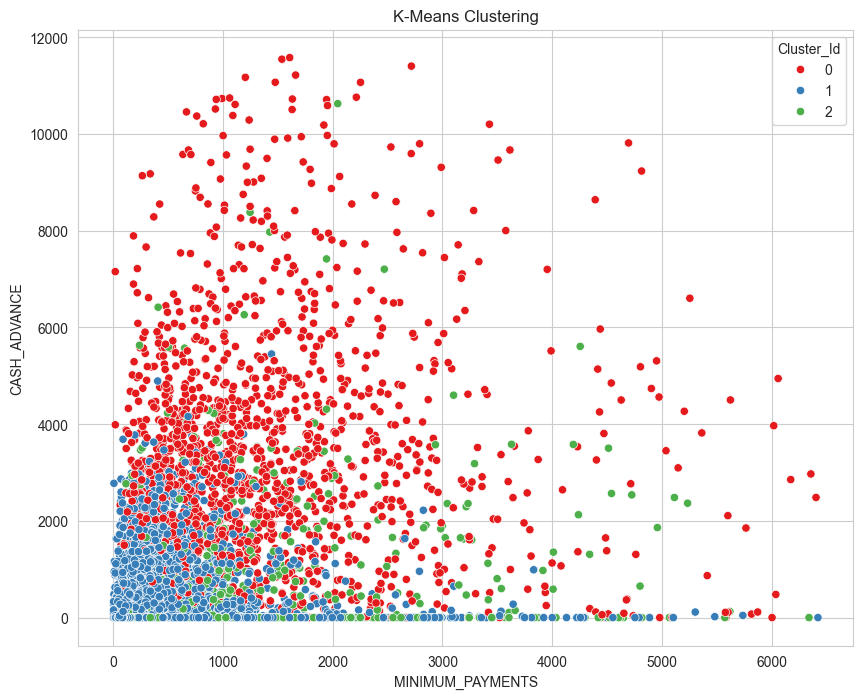

In [38]:
sns.scatterplot(data=df, x='MINIMUM_PAYMENTS', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

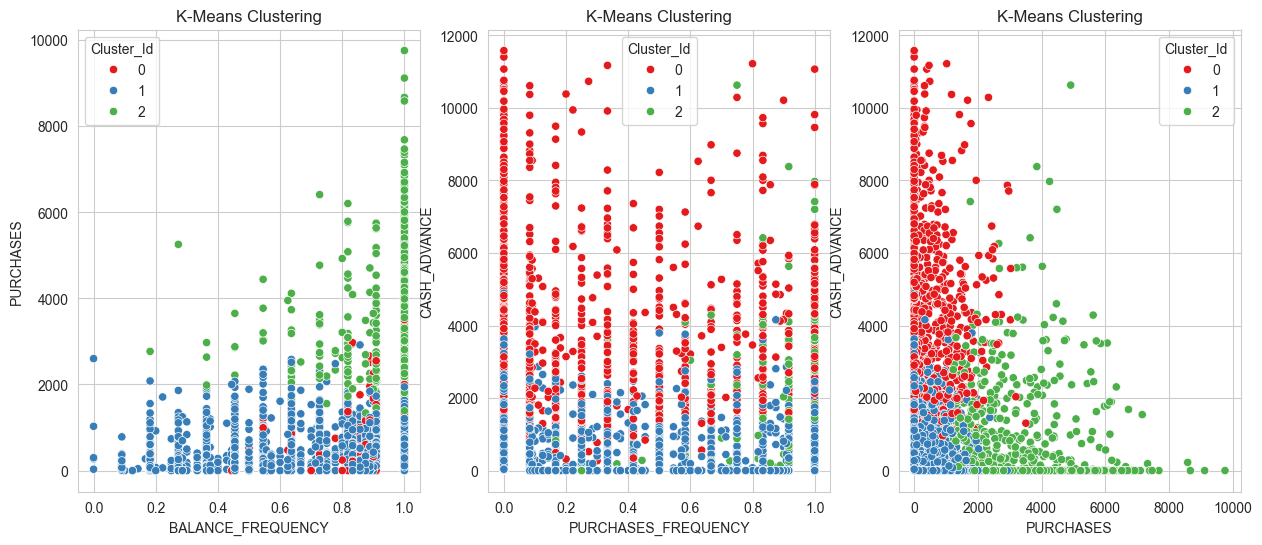

In [39]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='BALANCE_FREQUENCY', y='PURCHASES', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.show()

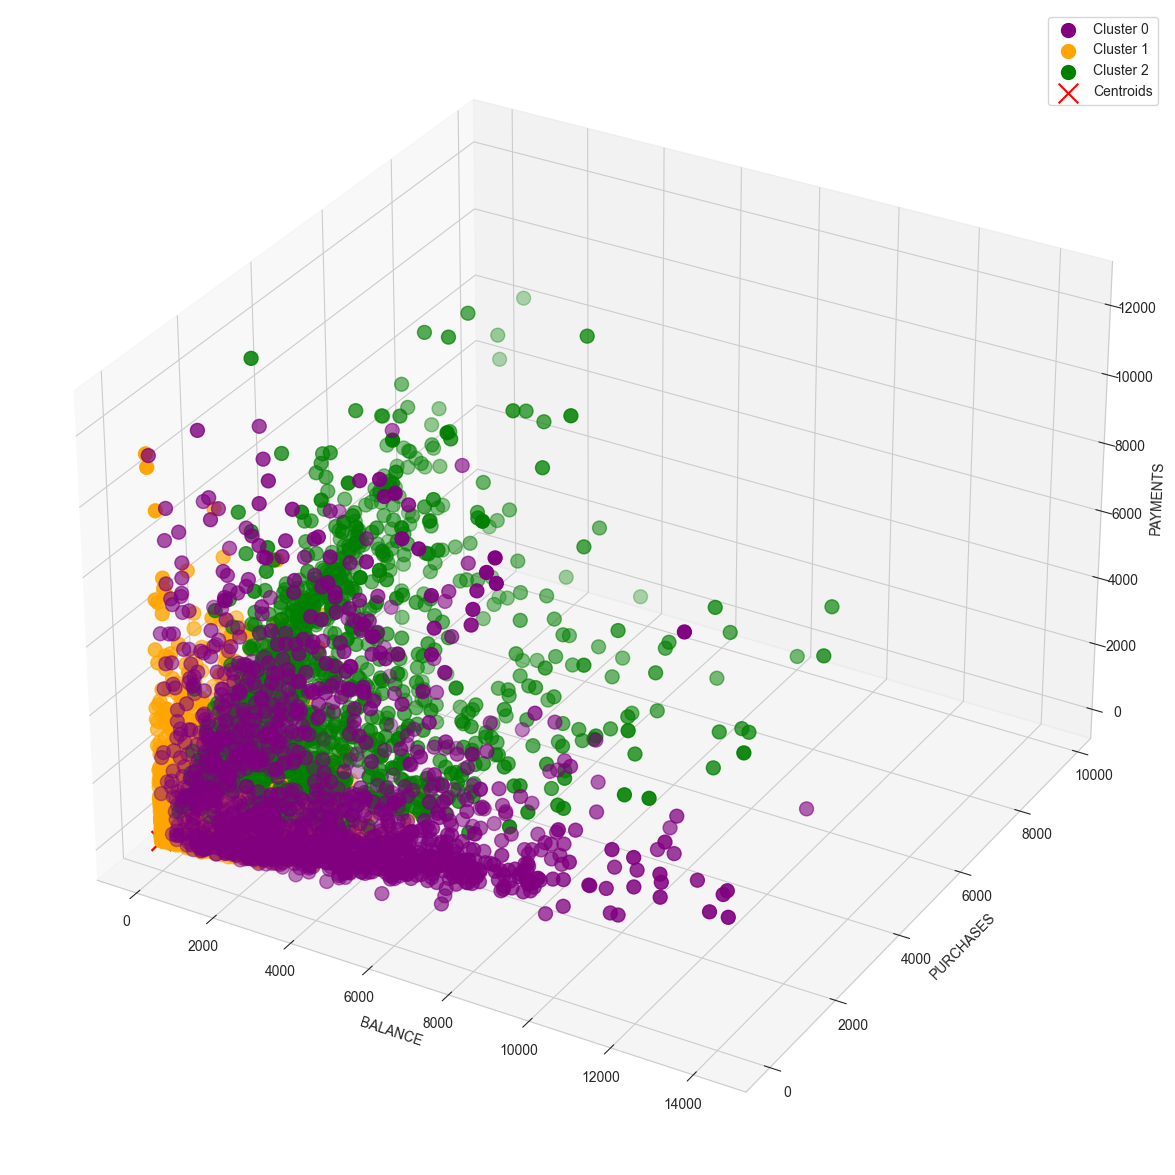

In [43]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[df['Cluster_Id'] == 0]['BALANCE'], df[df['Cluster_Id'] == 0]['PURCHASES'], df[df['Cluster_Id'] == 0]['PAYMENTS'], s=100, c='purple', label='Cluster 0')
ax.scatter(df[df['Cluster_Id'] == 1]['BALANCE'], df[df['Cluster_Id'] == 1]['PURCHASES'], df[df['Cluster_Id'] == 1]['PAYMENTS'], s=100, c='orange', label='Cluster 1')
ax.scatter(df[df['Cluster_Id'] == 2]['BALANCE'], df[df['Cluster_Id'] == 2]['PURCHASES'], df[df['Cluster_Id'] == 2]['PAYMENTS'], s=100, c='green', label='Cluster 2')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='x', label='Centroids')

# Add labels and legend
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('PAYMENTS')
plt.legend(loc='upper right')

plt.show()

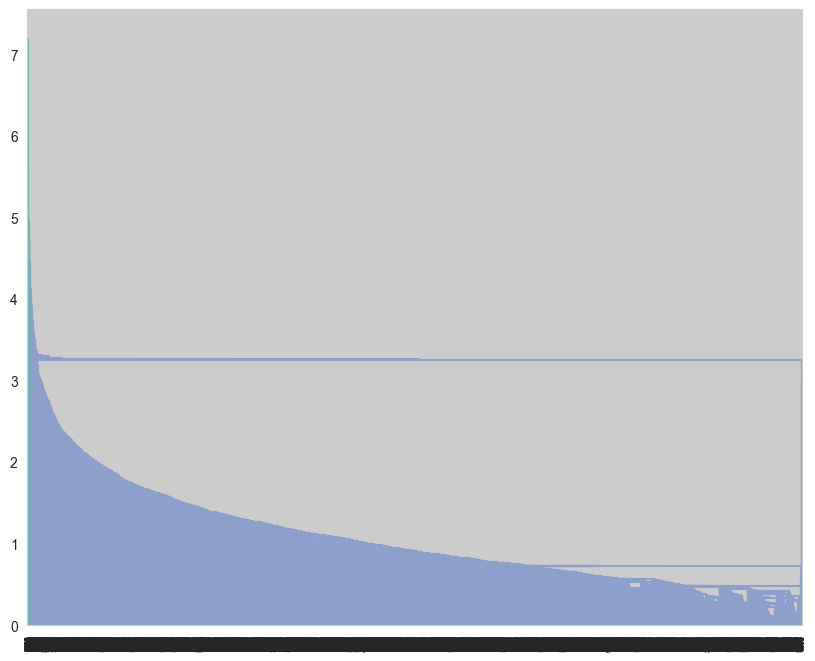

In [44]:
import sys
sys.setrecursionlimit(10000)  
# Single linkage: 
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

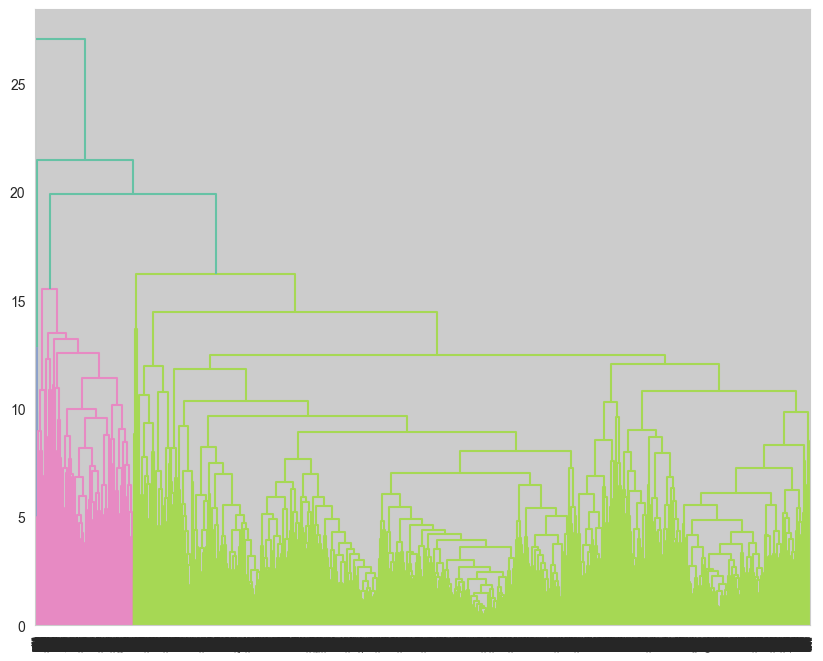

In [45]:
# Complete linkage

mergings_c = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

In [46]:
# since I had hot optimal 3 clusters we will cute dendogram there 
cluster_labels = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# Assign cluster labels for Hierarchical Clustering
df_1=df.copy()
df_1['Cluster_Labels'] = cluster_labels
df_1.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_Id  \
0   201.802084        139.509787          0.000000      12           1   
1  4103.032597       1072.340217          0.222222      12           0   
2   622.066742        627.284787          0.000000      12           1   
4   678.334763        244.791237          0.000000      12           1   
5  1400.057770       2407.246035          0.000000      12           1   

   Cluster_Labels  
0               0  
1               0  
2               0  
4               0  
5               0

<Axes: xlabel='Cluster_Id', ylabel='MINIMUM_PAYMENTS'>

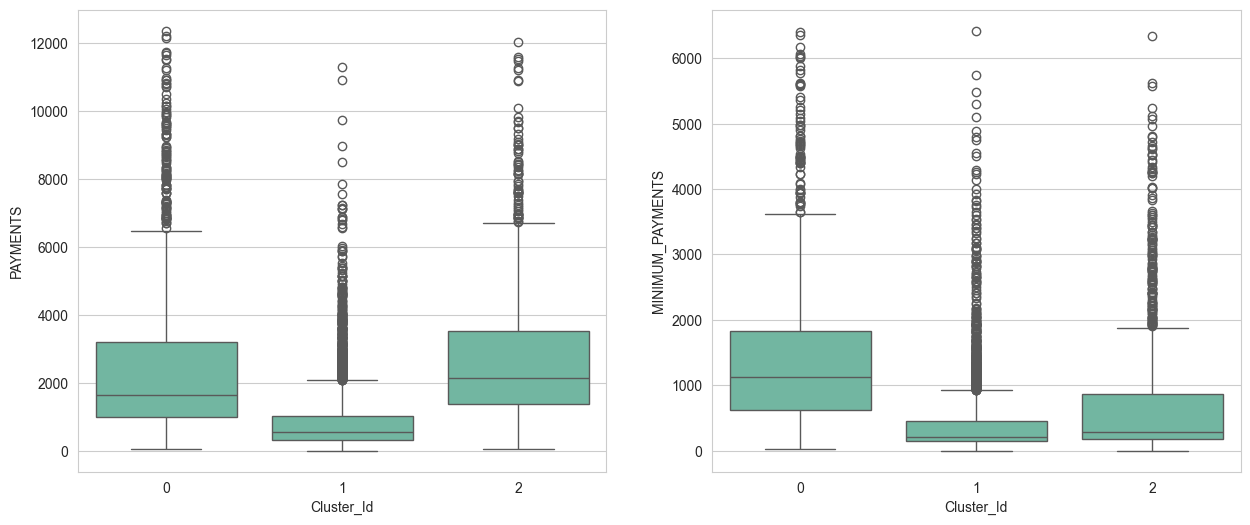

In [48]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='PAYMENTS', data=df_1)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='MINIMUM_PAYMENTS', data=df_1)

<Axes: xlabel='Cluster_Id', ylabel='PURCHASES'>

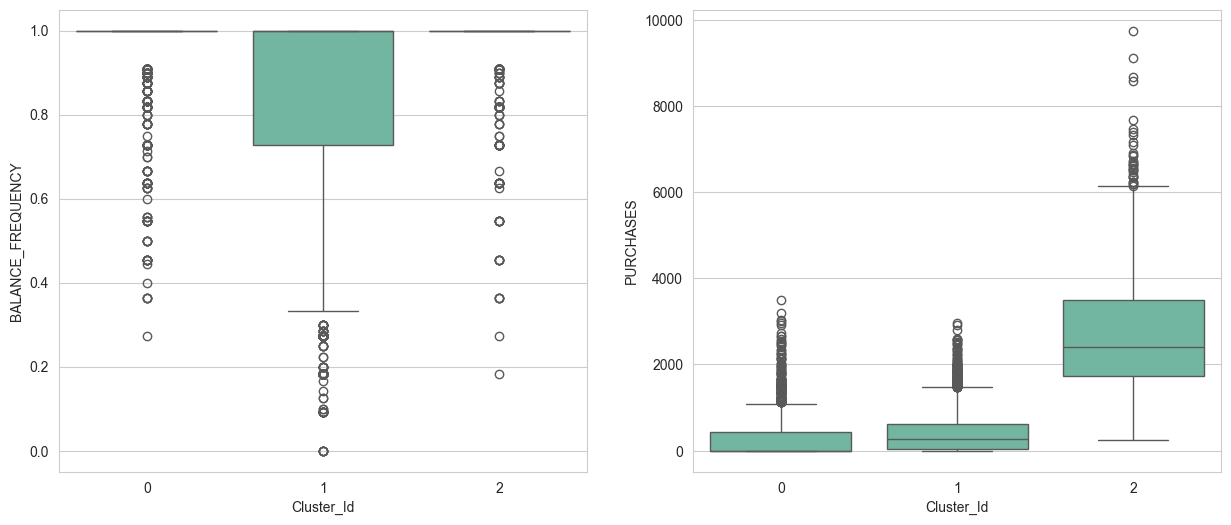

In [49]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='BALANCE_FREQUENCY', data=df_1)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='PURCHASES', data=df_1)

<Axes: xlabel='Cluster_Id', ylabel='CASH_ADVANCE'>

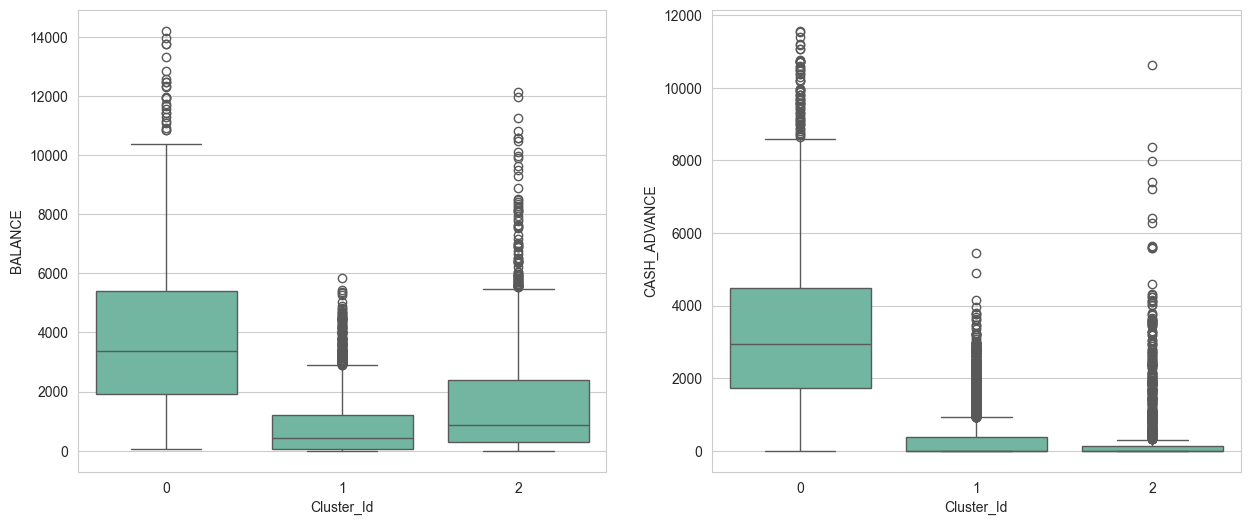

In [50]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='BALANCE', data=df_1)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='CASH_ADVANCE', data=df_1)

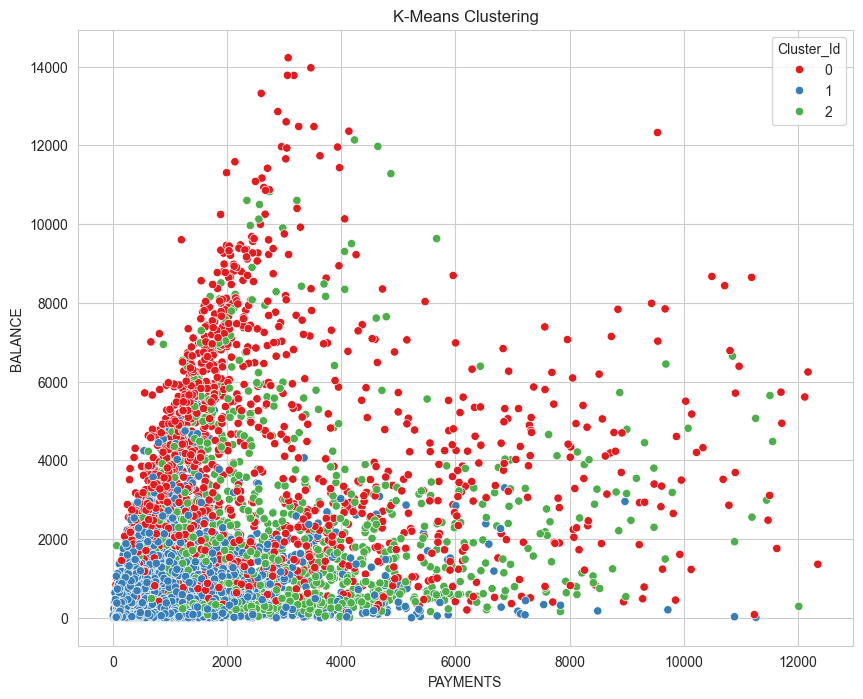

In [51]:
sns.scatterplot(data=df_1, x='PAYMENTS', y='BALANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

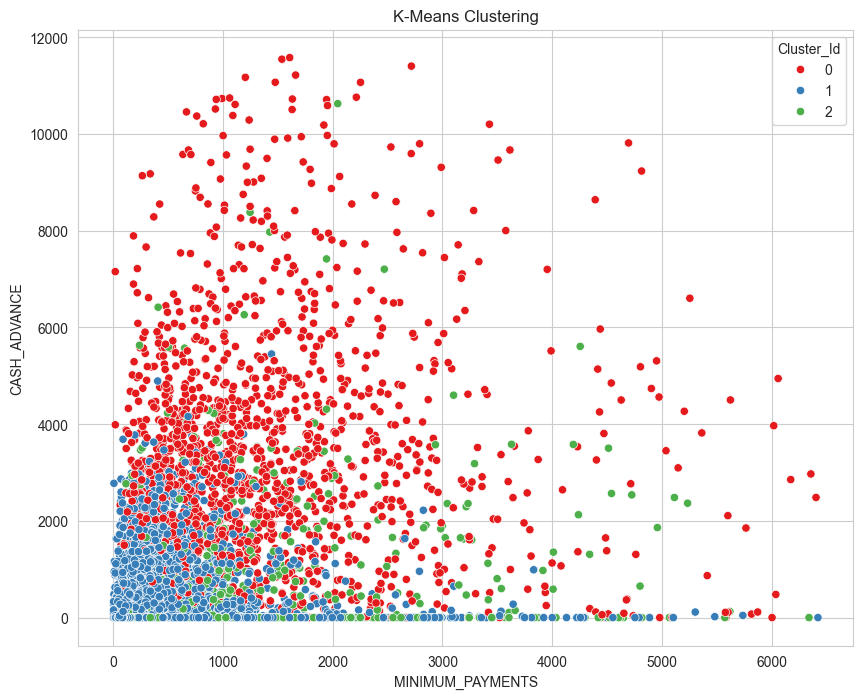

In [52]:
sns.scatterplot(data=df_1, x='MINIMUM_PAYMENTS', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')
plt.show()